In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
import math

In [4]:
df = pd.read_csv('../cleaned-data/pc-clusters.csv', encoding='iso-8859-1', sep="\t", usecols=['COMAX', 'AGE', 'COSEXE', 'CTSCPI'])

In [74]:
df_ = pd.read_csv('../cleaned-data/mc-clusters.csv', encoding='iso-8859-1', sep="\t", usecols=['COMAX', 'CTPE', 'CORELB'])

In [4]:
insee = pd.read_csv('../data/tj10.csv', encoding='iso-8859-1', sep=";", usecols=['CTSCPI', 'LISCPI'])

In [89]:
ctr = pd.read_csv('../cleaned-data/cleaned/contracts.csv', encoding='iso-8859-1', sep="\t", usecols=['COMAX', 'COPRO'])

In [96]:
prod = pd.read_csv('../cleaned-data/cleaned/products.csv', encoding='iso-8859-1', sep="\t", usecols=['COPRO', 'COPROG'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627710 entries, 0 to 627709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   COMAX   627710 non-null  object
 1   AGE     627710 non-null  int64 
 2   COSEXE  627710 non-null  int64 
 3   CTSCPI  627710 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 19.2+ MB


In [6]:
df.shape

(627710, 4)

In [7]:
df.columns

Index(['COMAX', 'AGE', 'COSEXE', 'CTSCPI'], dtype='object')

# Analyse une variable

## Clients Morales

### AGE

In [8]:
pd.DataFrame(df['AGE'].describe())

,AGE
count,627710.000000
mean,47.600875
std,23.227287
min,0.000000
25%,30.000000
50%,48.000000
75%,65.000000
max,124.000000


In [17]:
df.AGE.unique()

array([ 55,  41,  32,  23,  13,  61,  40,  69,  44,  10,  49,  84,  58,
        28,  31,  37,  19,   8,  56,   6,  78,  53,  46,   4,  54,  48,
        25,  66,  42,  57,  18,  35,  63,  39,  70,  81,  76,  52,  47,
        60,  59,  12,  51,  14,  68,  33,  67,  43,  26,  64,  74,   9,
        62,  50,  72,  95,  65,   2,  82,  80,  17,  94,  38,  16,  71,
        73,  34,  30,   3,  22,  36,  24,  20,  88,  83,  75,  21,  89,
        99,  85,  91,  86,  77,   7,  45,  29,   1,  15,   5,  11,  79,
        92,  98,  93,  87,  27,  90,  96, 100,  97, 101, 104,   0, 102,
       106, 107, 118, 105, 108, 103, 114, 110, 109, 112, 111, 115, 117,
       116, 113, 123, 120, 119, 121, 124])

In [18]:
df.AGE.nunique()

124

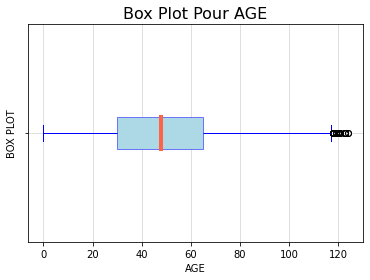

In [9]:
bp = plt.boxplot(df['AGE'], vert=False, patch_artist=True)
plt.yticks([1], [''])

plt.setp(bp['caps'],color='blue',alpha=1)
plt.setp(bp['whiskers'],color='blue',alpha=1)
plt.setp(bp['medians'],color='tomato',alpha=1,linewidth=4.0)
plt.setp(bp['boxes'], color='blue', facecolor='lightblue',alpha=1,linewidth=0.5)

plt.xlabel('AGE')
plt.ylabel('BOX PLOT')
plt.title('Box Plot Pour AGE', fontsize=16)

plt.grid(alpha=0.5)
plt.savefig("../graphs/age_box.svg")

In [20]:
age = df['AGE'].value_counts()
age = list(zip(age.index, age.values))
age.sort(key=lambda x: x[0])

In [31]:
for temp in age:
    print('AGE: {}, COUNT: {}, %: {}.'.format(temp[0], temp[1], temp[1] / df.shape[0] * 100))

AGE: 0, COUNT: 438, %: 0.06977744499848657.
AGE: 1, COUNT: 1215, %: 0.19356072071497984.
AGE: 2, COUNT: 1798, %: 0.2864380048111389.
AGE: 3, COUNT: 2229, %: 0.3551002851635309.
AGE: 4, COUNT: 2687, %: 0.4280639148651447.
AGE: 5, COUNT: 3225, %: 0.5137722833792675.
AGE: 6, COUNT: 3819, %: 0.6084019690621465.
AGE: 7, COUNT: 4190, %: 0.6675056953051569.
AGE: 8, COUNT: 4677, %: 0.7450892928263051.
AGE: 9, COUNT: 4924, %: 0.7844386739099266.
AGE: 10, COUNT: 5215, %: 0.8307976613404279.
AGE: 11, COUNT: 5392, %: 0.858995395963104.
AGE: 12, COUNT: 5501, %: 0.8763601025951475.
AGE: 13, COUNT: 5541, %: 0.882732472001402.
AGE: 14, COUNT: 5817, %: 0.9267018209045578.
AGE: 15, COUNT: 6185, %: 0.9853276194420991.
AGE: 16, COUNT: 6190, %: 0.9861241656178809.
AGE: 17, COUNT: 6430, %: 1.0243583820554079.
AGE: 18, COUNT: 6639, %: 1.0576540122030873.
AGE: 19, COUNT: 6635, %: 1.057016775262462.
AGE: 20, COUNT: 7027, %: 1.119465995443756.
AGE: 21, COUNT: 6757, %: 1.076452501951538.
AGE: 22, COUNT: 6822, %:

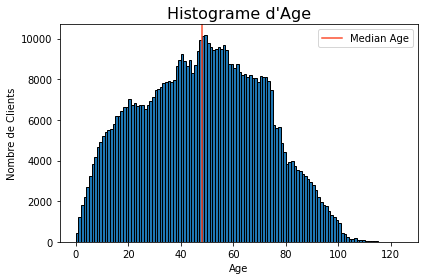

In [73]:
bins = [i for i in range(125)]
plt.hist(df['AGE'], bins=bins, edgecolor='black')
plt.axvline(df.AGE.median(), color='#FC4F30', label='Median Age')

plt.xlabel('Age')
plt.ylabel('Nombre de Clients')
plt.title("Histograme d'Age", fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig("../graphs/age_hist.svg")

### SEXE

In [15]:
# O is for male, and 1 for female
sex = df['COSEXE'].value_counts(normalize=True)

In [16]:
sex.values

array([0.50457536, 0.49542464])

In [17]:
sex.index

Int64Index([0, 1], dtype='int64')

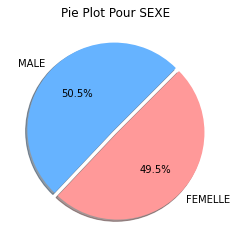

In [18]:
colors = ['#66b3ff', '#ff9999']
labels = ['MALE', 'FEMELLE']
explode = [0.025, 0.025]
plt.pie(sex.values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)

plt.title('Pie Plot Pour SEXE')
plt.savefig("../graphs/sexe.svg")

### CTSCPI

In [51]:
df.CTSCPI.unique()

array([4600, 4700, 3500, 8400, 6200, 8600, 8500, 7600, 6300, 5400, 2300,
       3700, 4200, 4300, 6400, 3100, 3300, 4800, 5200, 7300, 5600, 3400,
       2200, 5500, 5300, 4500, 1100, 2100, 7200, 6800, 6700, 8100, 7700,
       7100, 6500, 3800, 7500, 6900, 7400, 1200, 8200, 3600, 7800, 4400,
       1300, 5100, 8300, 6600, 1000, 6100])

In [52]:
df.CTSCPI.nunique()

50

In [57]:
ctscpi = df['CTSCPI'].value_counts()
ctscpi = list(zip(ctscpi.index, ctscpi.values))

In [58]:
for temp in ctscpi:
    print('INSEE: {}, COUNT: {}, %: {}.'.format(temp[0], temp[1], temp[1] / df.shape[0] * 100))

INSEE: 8400, COUNT: 109127, %: 17.384938904908317.
INSEE: 7600, COUNT: 67948, %: 10.824743910404486.
INSEE: 8500, COUNT: 46771, %: 7.451052237498208.
INSEE: 8600, COUNT: 33876, %: 5.39675965015692.
INSEE: 5400, COUNT: 33090, %: 5.271542591324019.
INSEE: 7300, COUNT: 31356, %: 4.995300377562888.
INSEE: 5200, COUNT: 30174, %: 4.806996861608067.
INSEE: 5500, COUNT: 22273, %: 3.5482945946376514.
INSEE: 2300, COUNT: 17449, %: 2.7797868442433606.
INSEE: 4200, COUNT: 17261, %: 2.749836708033965.
INSEE: 7200, COUNT: 15968, %: 2.543849866976789.
INSEE: 5600, COUNT: 15812, %: 2.5189976262923963.
INSEE: 4300, COUNT: 14949, %: 2.3815137563524558.
INSEE: 6300, COUNT: 13536, %: 2.1564098070765163.
INSEE: 3700, COUNT: 13038, %: 2.077073807968648.
INSEE: 2100, COUNT: 12934, %: 2.0605056475123864.
INSEE: 4600, COUNT: 12814, %: 2.0413885392936226.
INSEE: 4700, COUNT: 12748, %: 2.030874129773303.
INSEE: 3400, COUNT: 12678, %: 2.0197224833123575.
INSEE: 8100, COUNT: 11344, %: 1.8072039636137707.
INSEE: 31

## Clients Morales

### CTPE

In [75]:
df_['CTPE'].unique()

array([1, 2])

In [76]:
df_['CTPE'].nunique()

2

In [77]:
df_['CTPE'].value_counts()

1    2793416
2     185730
Name: CTPE, dtype: int64

In [78]:
ctpe = df_['CTPE'].value_counts(normalize=True)
ctpe

1    0.937657
2    0.062343
Name: CTPE, dtype: float64

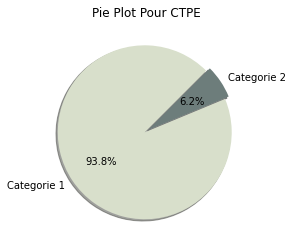

In [81]:
colors = ['#D8DFCB', '#6D7D7B']
labels = ['Categorie 1', 'Categorie 2']
explode = [0.025, 0.025]
plt.pie(ctpe.values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)

plt.title('Pie Plot Pour CTPE')
plt.savefig("../graphs/ctpe.svg")

### CORELB

In [82]:
df_['CORELB'].unique()

array([1, 4])

In [83]:
df_['CORELB'].nunique()

2

In [84]:
df_['CORELB'].value_counts()

1    2626102
4     353044
Name: CORELB, dtype: int64

In [86]:
corelb = df_['CORELB'].value_counts(normalize=True)
corelb

1    0.881495
4    0.118505
Name: CORELB, dtype: float64

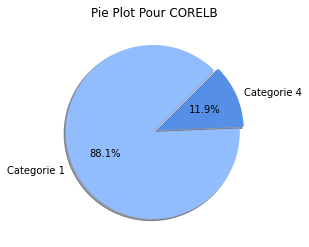

In [88]:
colors = ['#91bdff', '#558fe6']
labels = ['Categorie 1', 'Categorie 4']
explode = [0.025, 0.025]
plt.pie(corelb.values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)

plt.title('Pie Plot Pour CORELB')
plt.savefig("../graphs/corelb.svg")

## Contracts

In [92]:
# PRODUITS
ctr['COPRO'].nunique()

37

In [93]:
# CLIENTS
ctr['COMAX'].nunique()

637143

In [94]:
# CONTRACTS TITAL
ctr['COMAX'].count()

28685139

## Produits

In [97]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   COPRO   2341 non-null   int64 
 1   COPROG  2341 non-null   object
dtypes: int64(1), object(1)
memory usage: 36.7+ KB


### COPRO

In [98]:
prod.COPRO.unique()

array([7018, 2116, 2019, ...,  692,  653,  872])

In [103]:
# Nombre de produits
prod.COPRO.nunique()

2341

### COPROG

In [100]:
COPROprod.COPROG.unique()

array(['I1221', 'G1311', 'G331B', 'G4115', 'I9114', 'D1216', 'B3411',
       'F2213', 'M1211', 'I2146', 'L2412', 'I2421', 'G8211', 'I4213',
       'I1219', 'G8111', 'I3231', 'I9113', 'H5212', 'I7231', 'G5515',
       'B2211', 'I2174', 'B1213', 'I4112', 'G3111', 'I2163', 'B2214',
       'D121H', 'G1412', 'D1217', 'H5522', 'D1232', 'I2312', 'L3162',
       'G1511', 'Z1151', 'K1912', 'D1231', 'D1414', 'K3111', 'H1211',
       'F2221', 'L3171', 'I3214', 'B2113', 'G4316', 'I3313', 'D1219',
       'G1112', 'I4511', 'G1414', 'D1415', 'M1213', 'I2155', 'D1212',
       'Y7129', 'I121B', 'M9211', 'Z1152', 'I2162', 'B3317', 'I1311',
       'B3311', 'H4642', 'H5511', 'D1131', 'I3315', 'I6111', 'B1113',
       'F1437', 'H5512', 'D2121', 'H2512', 'I2173', 'I3A21', 'I4211',
       'I2122', 'Z1141', 'D1411', 'I3212', 'G331A', 'I3411', 'D1122',
       'F1414', 'I7111', 'I3A22', 'F1313', 'M2121', 'G5513', 'I2951',
       'M2112', 'K3114', 'I2114', 'K3115', 'G3322', 'I2412', 'B3213',
       'B1919', 'D22

In [102]:
# Nmbre de groupe de produits
prod.COPROG.nunique()

456

# Analyse deux variables

In [28]:
insee.head()

,CTSCPI,LISCPI
0,6600,OUVRIERS NON QUALITES
1,6100,OUVRIER QUALIFIE
2,8200,INACTIFS DIVERS NON RETRAITES
3,1300,AGRICULTEUR GRANDE EXPLOITATION
4,6500,OUV QUAL MANUT MAGASIN TRANSPORT


In [29]:
df.head()

,COMAX,AGE,COSEXE,CTSCPI
0,6e3a2b9fa1,55,1,4600
1,1b44a67f61,41,0,4700
2,bdf1f63a98,32,1,3500
3,bc9f2a4a5c,23,1,8400
4,deb8a278df,13,0,8400


## AGE INSEE

In [33]:
age_insee = df.groupby('AGE')['CTSCPI'].value_counts()
age_insee.head(10)

AGE  CTSCPI
0    8400       352
     8500        86
1    8400       978
     8500       235
     3300         1
     8100         1
2    8400      1444
     8500       351
     5400         2
     4700         1
Name: CTSCPI, dtype: int64

## SEXE INSEE

In [34]:
sex_insee = df.groupby('COSEXE')['CTSCPI'].value_counts()
sex_insee.head(10)

COSEXE  CTSCPI
0       8400      54269
        7600      31629
        8500      19239
        7300      17837
        2300      13188
        6300      12580
        5400      11471
        7200      10982
        5200      10918
        2100      10384
Name: CTSCPI, dtype: int64

In [41]:
ctr.head()

,COMAX,COPRO
0,6de50a0fab,807
1,6de50a0fab,807
2,6de50a0fab,807
3,6de50a0fab,807
4,6de50a0fab,807


In [43]:
df.head()

,COMAX,AGE,COSEXE,CTSCPI
0,6e3a2b9fa1,55,1,4600
1,1b44a67f61,41,0,4700
2,bdf1f63a98,32,1,3500
3,bc9f2a4a5c,23,1,8400
4,deb8a278df,13,0,8400


## Produits SEXE

In [64]:
women = df[df['COSEXE'] == 1]['COMAX']
men = df[df['COSEXE'] == 0]['COMAX']

In [68]:
women_best = ctr[ctr['COMAX'].isin(women)]['COPRO'].value_counts()

In [70]:
women_best

812     8339042
2076    1241693
647      341418
65       317691
160      272954
954      243331
753      218417
137      204714
53       202092
100      181310
4545     154757
646      142787
1556     128976
3        128398
7530     128357
7652     121746
823      106084
542       90013
780       79191
1752      78247
411       72438
7604      69678
600       68667
867       66757
8         65491
52        61827
1759      54430
807       53799
1         52991
2114      52858
2350      51576
727       50921
97        50294
7532      44049
384       36579
820       33681
658       32972
Name: COPRO, dtype: int64

In [72]:
men_best = ctr[ctr['COMAX'].isin(men)]['COPRO'].value_counts()

In [74]:
men_best

812     8627831
2076    1683022
647      396901
65       343564
160      327437
753      268807
954      252049
137      207448
53       193572
100      179643
646      170916
4545     159635
823      144342
1556     144208
7604     130617
542      129148
7530     120856
3        118857
7652     116007
780      107566
1752      90792
807       88337
658       82073
411       81618
867       73630
384       70873
600       70310
820       68556
1759      68019
97        66791
2114      66118
1         59530
7532      59469
52        57167
2350      56767
727       52274
8         43151
Name: COPRO, dtype: int64

## Produits AGE

In [79]:
age = dict()
for key in df.AGE:
    age[key] = None

In [80]:
for key in age.keys():
    temp = df[df['AGE'] == key]['COMAX']
    age[key] = ctr[ctr['COMAX'].isin(temp)]['COPRO'].value_counts()

In [91]:
age[19]

812     156670
727       5664
160       5368
954       4767
4545      4395
7652      3333
100       2939
137       2330
1         2257
647       1743
867       1173
53        1023
600        960
753        598
646        568
7604       297
780        258
52         194
3          179
65          91
807         51
823         46
1556        44
820         42
2076        29
411         29
1752        23
542         13
7530        12
97           7
384          6
7532         3
658          3
8            3
Name: COPRO, dtype: int64

## Produits INSEE 

In [83]:
insee_prod = dict()
for key in df.CTSCPI.unique():
    insee_prod[key] = None

In [85]:
for key in insee_prod.keys():
    temp = df[df['CTSCPI'] == key]['COMAX']
    insee_prod[key] = ctr[ctr['COMAX'].isin(temp)]['COPRO'].value_counts()

In [90]:
insee_prod[8400]

812     1735471
7652      61321
160       59407
727       55228
954       49101
100       37623
65        37353
4545      36536
137       33858
53        30489
867       27476
647       24383
1         22929
753       17791
2076      16321
600       15447
646       13758
7604       8171
780        5788
3          4588
52         2172
1752       2013
411        1971
807        1382
8          1019
1556        614
7530        527
2350        525
823         459
97          454
1759        335
2114        334
820         331
542         286
658         228
7532        224
384         164
Name: COPRO, dtype: int64

## Produits CTPE

In [104]:
ctpe_1 = df_[df_['CTPE'] == 1]['COMAX']
ctpe_2 = df_[df_['CTPE'] == 2]['COMAX']

### Categorie 1

In [105]:
ctpe_1_best = ctr[ctr['COMAX'].isin(ctpe_1)]['COPRO'].value_counts()

In [106]:
ctpe_1_best

812     14876899
2076     2622035
647       678841
65        631110
160       573577
954       473959
753       461984
137       393736
53        376871
100       344540
4545      301352
646       275667
1556      258901
7530      239907
823       234677
3         234480
7652      229300
542       198968
7604      171526
1752      159224
780       150977
411       147568
867       138085
600       131437
807       129931
1759      114706
52        113359
2114      111458
97        109303
1         106498
8         105017
2350      103110
727       102701
7532       96493
820        94788
384        93076
658        68763
Name: COPRO, dtype: int64

### Categorie 2

In [109]:
ctpe_2_best = ctr[ctr['COMAX'].isin(ctpe_2)]['COPRO'].value_counts()

In [110]:
ctpe_2_best

812     2893722
2076     413606
647       88083
658       65319
160       52151
646       52010
65        49465
780       47340
753       44348
7604      42997
954       35686
53        32909
542       30029
137       29156
100       27081
823       26209
384       24999
1556      23799
4545      23422
3         21168
807       19201
7530      17269
1752      15514
7652      13990
820       12541
600       12352
97        12114
1759      11978
411       11839
7532      11824
2114      11660
1          9841
52         9496
2350       8922
8          6956
867        5709
727        2158
Name: COPRO, dtype: int64

## Produits CORELB

In [112]:
corelb_1 = df_[df_['CORELB'] == 1]['COMAX']
corelb_4 = df_[df_['CORELB'] == 2]['COMAX']

### Categorie 1

In [117]:
corelb_1_best = ctr[ctr['COMAX'].isin(corelb_1)]['COPRO'].value_counts()
corelb_1_best

812     16913651
2076     2757039
647       738476
65        629239
160       576147
954       482820
753       462051
137       404180
53        388528
100       357408
4545      315552
646       313999
1556      268646
823       249635
7530      247613
3         240183
7652      228206
542       215170
7604      198337
780       179596
1752      167405
411       154171
807       142316
600       137992
867       137400
1759      121190
2114      117786
52        117444
97        116032
658       113326
1         109630
2350      107478
8         105119
384       104787
7532      103471
820       102014
727       100199
Name: COPRO, dtype: int64

### Categorie 4

In [119]:
corelb_4_best = ctr[ctr['COMAX'].isin(corelb_4)]['COPRO'].value_counts()
corelb_4_best

Series([], Name: COPRO, dtype: int64)